In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torch.utils.data import Dataset

In [2]:
df_train = pd.read_csv('../data/training.csv')
df_test = pd.read_csv('../data/test.csv')
df_id_table = pd.read_csv('../data/IdLookupTable.csv')

In [21]:
pip install torchvision


     ---------------------------------------- 1.2/1.2 MB 3.0 MB/s eta 0:00:00


In [3]:
#df_train
df_train.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [4]:
df_train.shape

(7049, 31)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

Columns and their types in df_train:

-left(right)_eye_center_x(y) - x(y) coordinate of location of center of left(right) eye on image - float,

-left(right)_eye_inner_corner_x(y) - x(y) coordinate of location of inner corner of left(right) eye - float,

-left(right)_eye_outer_corner_x(y) - x(y) coordinate of location of outer corner of left(right) eye - float,

-left(right)_eyebrow_inner_end_x(y) - x(y) coordinate of location of inner end of left(right) eyebrow - float,

-left(right)_eyebrow_outer_end_x(y) - x(y) coordinate of location of outer end of left(right) eyebrow - float,

-nose_tip_x(y) - x(y) coordinate of tip of nose - float,

-mouth_left(right)_corner_x(y) - x(y) coordinate of location of left(right) corner of mouth - float,

-mouth_center_top(bottom)_lip_x(y) - x(y) coordinate of top(bottom) center of mouth - float,

-Image - matrix representing image - matrix

In [6]:
df=df_train.corr()
df

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
left_eye_center_x,1.000000,0.029908,0.274459,-0.154728,0.856572,0.022211,0.879976,0.062128,0.308649,-0.104698,...,0.457468,0.192274,0.422891,0.284087,-0.008382,0.202842,0.260753,0.151302,0.374314,0.265655
left_eye_center_y,0.029908,1.000000,0.259012,0.346331,0.065749,0.926728,-0.013411,0.956066,0.101996,0.537101,...,-0.166891,0.333053,-0.340755,0.480924,-0.392434,0.219366,-0.425576,0.251472,-0.379980,0.130062
right_eye_center_x,0.274459,0.259012,1.000000,0.067621,0.294550,0.127367,-0.024408,0.060942,0.817895,0.090214,...,0.402189,0.024502,0.061124,-0.172144,0.424439,-0.215123,0.308889,-0.109026,0.319541,-0.251105
right_eye_center_y,-0.154728,0.346331,0.067621,1.000000,-0.149295,0.531960,-0.144389,0.221829,0.055758,0.923050,...,0.182866,0.329233,0.312434,0.098019,0.257956,0.397645,0.294145,0.198499,0.344010,0.044597
left_eye_inner_corner_x,0.856572,0.065749,0.294550,-0.149295,1.000000,-0.021444,0.653318,0.080430,0.267661,-0.172852,...,0.387317,-0.054712,0.287427,0.156495,0.145968,0.046439,0.322217,-0.083635,0.242669,0.303769
left_eye_inner_corner_y,0.022211,0.926728,0.127367,0.531960,-0.021444,1.000000,0.010531,0.869743,0.150281,0.710354,...,-0.091006,0.426897,-0.211855,0.493657,-0.335989,0.327081,-0.315929,0.387311,-0.367069,0.308555
left_eye_outer_corner_x,0.879976,-0.013411,-0.024408,-0.144389,0.653318,0.010531,1.000000,0.054156,0.316254,-0.094245,...,0.179189,0.165361,0.507755,0.325291,-0.136411,0.263466,0.229154,0.292129,0.176392,0.332880
left_eye_outer_corner_y,0.062128,0.956066,0.060942,0.221829,0.080430,0.869743,0.054156,1.000000,0.050529,0.373183,...,-0.176047,0.222928,-0.392594,0.506364,-0.462165,0.183239,-0.494482,0.216060,-0.561581,0.329316
right_eye_inner_corner_x,0.308649,0.101996,0.817895,0.055758,0.267661,0.150281,0.316254,0.050529,1.000000,0.124023,...,0.377931,0.118548,0.262597,-0.054888,0.262056,-0.094748,0.369890,0.109785,0.309453,-0.230177
right_eye_inner_corner_y,-0.104698,0.537101,0.090214,0.923050,-0.172852,0.710354,-0.094245,0.373183,0.124023,1.000000,...,0.053212,0.356647,0.237858,0.225398,0.108121,0.449346,0.176403,0.354693,0.203002,0.164086


In [7]:
df_test.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [8]:
df_test.shape

(1783, 2)

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ImageId  1783 non-null   int64 
 1   Image    1783 non-null   object
dtypes: int64(1), object(1)
memory usage: 28.0+ KB


In [10]:
df_id_table.head()

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN


In [11]:
df_id_table.shape

(27124, 4)

In [12]:
df_id_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27124 entries, 0 to 27123
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   RowId        27124 non-null  int64  
 1   ImageId      27124 non-null  int64  
 2   FeatureName  27124 non-null  object 
 3   Location     0 non-null      float64
dtypes: float64(1), int64(2), object(1)
memory usage: 847.8+ KB


## Preprocessing


#### Alter loss function

In [26]:
def MSELoss(output, target):
    filter = ~torch.isnan(target)
    return ((output[filter] - target[filter]) ** 2).mean()

In [27]:
class FacialKeypointsDataset(Dataset):
    def __init__(self, dataframe: pd.DataFrame, transforms=None):
        self.df = dataframe
        self.transforms = transforms
        
        self.images = []
        self.keypoints = []
        
        for index, row in self.df.iterrows():
            # Image
            image = row['Image']
            image = np.fromstring(image, sep=' ').reshape([96, 96])
            image = np.stack((image, image, image), axis=-1)
            image = image / 255.0
            
            # Keypoints
            keypoints = row.drop(['Image'])
            keypoints = keypoints.to_numpy().astype('float32')
            
            # Add to Dataset's images and keypoints
            self.images.append(image)
            self.keypoints.append(keypoints)

    def __getitem__(self, idx):
        image = self.images[idx]
        keypoints = self.keypoints[idx]
        
        return_dict = {'image': image, 'keypoints': keypoints}

        if self.transforms:
            return_dict = self.transforms(return_dict)

        return return_dict

    def __len__(self):
        return len(self.df)

7049


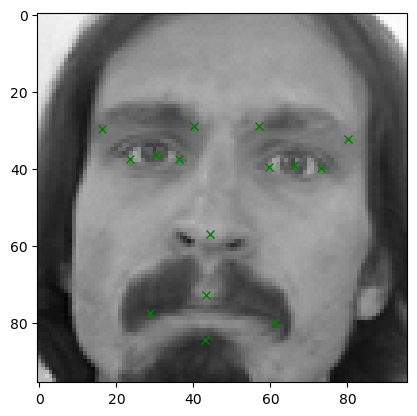

In [28]:
dataset = FacialKeypointsDataset(pd.read_csv('../data/training.csv'))
print(len(dataset))
datapoint = dataset[0]
# print(datapoint)
img = datapoint['image']
keypoints = datapoint['keypoints']
plt.imshow(img, cmap='gray')
plt.plot(keypoints[0::2], keypoints[1::2], 'gx')
plt.show()

In [33]:
class MyToTensor(object):

    def __call__(self, img_with_keypoints):
        image, keypoints = img_with_keypoints["image"], img_with_keypoints["keypoints"]
        image = np.transpose(image, (2, 0, 1)).copy()

        image = torch.from_numpy(image).type(torch.FloatTensor)
        keypoints = torch.from_numpy(keypoints).type(torch.FloatTensor)

        return {'image': image, 'keypoints': keypoints}